Every row in this SAS dataset corresponds to a brand choice occasion between Heinz and Hunts ketchup products. The purpose of this project is to provide marketing analytics insights to Heinz in the following ways:
<br/>  
1. Determine which promotional methods are effective in influencing consumer brand choice.  
2. Build a machine learning model that predicts whether a customer is likely to choose Heinz based on prices and promotional methods. This model is to be used to send coupons to potential Heinz customers at minimum misclassification cost.  

The dataset consists of the following variables:  
- **Heinz**: 1 if Heinz was purchased, 0 if Hunts was purchased  
- **PriceHeinz**: Price of Heinz at the time of purchase  
- **PriceHunts**: Price of Hunts at the time of purchase  
- **DisplHeinz**: 1 if Heinz had a store display, 0 if Heinz did not have a store display at the time of purchase
- **DisplHunts**: 1 if Hunts had a store display, 0 if Hunts did not have a store display at the time of purchase
- **FeatureHeinz**: 1 if Heinz had a store feature, 0 if Heinz did not have a store feature at the time of purchase
- **FeatureHunts**: 1 if Hunts had a store feature, 0 if Hunts did not have a store feature at the time of purchase

### Import basic libraries and set plotting style to match notebook theme

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()

### Read the SAS dataset into a Pandas dataframe

In [24]:
data = pd.read_sas('heinzhunts.sas7bdat')
data.head(10)

,HEINZ,HUNTS,PRICEHEINZ,PRICEHUNTS,FeatHeinz,FeatHunts,DisplHeinz,DisplHunts
0,1.0,0.0,0.052,0.034,0.0,0.0,0.0,0.0
1,1.0,0.0,0.052,0.044,0.0,0.0,0.0,0.0
2,1.0,0.0,0.046,0.048,1.0,0.0,0.0,0.0
3,1.0,0.0,0.052,0.034,0.0,0.0,0.0,0.0
4,1.0,0.0,0.046,0.048,1.0,0.0,0.0,0.0
5,1.0,0.0,0.047,0.030,0.0,0.0,0.0,0.0
6,1.0,0.0,0.046,0.041,0.0,1.0,0.0,1.0
7,1.0,0.0,0.046,0.031,0.0,0.0,0.0,0.0
8,1.0,0.0,0.047,0.031,0.0,0.0,0.0,0.0
9,1.0,0.0,0.050,0.028,0.0,0.0,0.0,1.0


# Exploratory Data Analysis

Let's observe some basic descriptive statistics of the variables in the dataset and their data-types

In [25]:
data.describe()

,HEINZ,HUNTS,PRICEHEINZ,PRICEHUNTS,FeatHeinz,FeatHunts,DisplHeinz,DisplHunts
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000
mean,0.890279,0.109721,0.034828,0.033555,0.162259,0.045747,0.197284,0.044675
std,0.312598,0.312598,0.008974,0.005307,0.368754,0.208973,0.398019,0.206626
min,0.000000,0.000000,0.001000,0.003000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.030000,0.031000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.034000,0.034000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.042000,0.036000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.061000,0.087000,1.000000,1.000000,1.000000,1.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 8 columns):
HEINZ         2798 non-null float64
HUNTS         2798 non-null float64
PRICEHEINZ    2798 non-null float64
PRICEHUNTS    2798 non-null float64
FeatHeinz     2798 non-null float64
FeatHunts     2798 non-null float64
DisplHeinz    2798 non-null float64
DisplHunts    2798 non-null float64
dtypes: float64(8)
memory usage: 175.0 KB


We can see that the categorical variables are registered in this dataframe as floats, let's convert them to integers.

In [27]:
for var in ['HEINZ','HUNTS','FeatHeinz','FeatHunts','DisplHeinz','DisplHunts']:
    data[var] = data[var].astype(int)

Now check the dataset again to make sure the datatypes are correct.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 8 columns):
HEINZ         2798 non-null int64
HUNTS         2798 non-null int64
PRICEHEINZ    2798 non-null float64
PRICEHUNTS    2798 non-null float64
FeatHeinz     2798 non-null int64
FeatHunts     2798 non-null int64
DisplHeinz    2798 non-null int64
DisplHunts    2798 non-null int64
dtypes: float64(2), int64(6)
memory usage: 175.0 KB


Let's visualize the class distribution of the Heinz variable, since that will be the outcome variable when building the predictive model.

Text(0.5, 1.0, 'Instance Distributions of Heinz and Hunts')

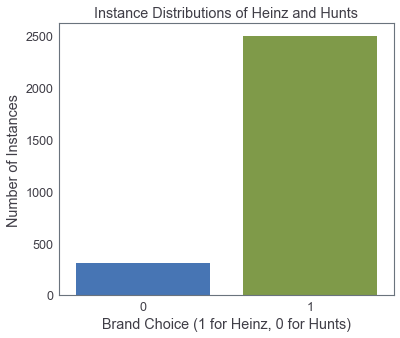

In [29]:
plt.figure(figsize=(6,5))
sns.countplot(x='HEINZ',data=data)
plt.grid(axis='y')
plt.xlabel('Brand Choice (1 for Heinz, 0 for Hunts)')
plt.ylabel('Number of Instances')
plt.title('Instance Distributions of Heinz and Hunts')

In [30]:
# Display counts of each class
value_counts = data['HEINZ'].value_counts()
print(value_counts,'\n')

# Calculate instance rate of each class
values_1 = value_counts[1]
values_2 = value_counts[0]
sum_values = values_1 + values_2
print('Class distributions: {:.2f} for Heinz and {:.2f} for Hunts'.format(values_1/sum_values, values_2/sum_values))

1    2491
0     307
Name: HEINZ, dtype: int64 

Class distributions: 0.89 for Heinz and 0.11 for Hunts


It is clear that this dataset contains more Heinz purchases than Hunts. This could pose a problem for our predictive model: a classification algorithm is likely to consider the minority class as noise, and predict the majority class most of the time. So the model is likely to misclassify the minority class compared to the majority class. Thus, the accuracy metric is not suitable as it will overstimate model performance. How do we handle such class imbalance? More on this later on.


Let's look at the distributions of Heinz and Hunts prices using frequency plots and boxplots:

Text(0.5, 0, 'Price')

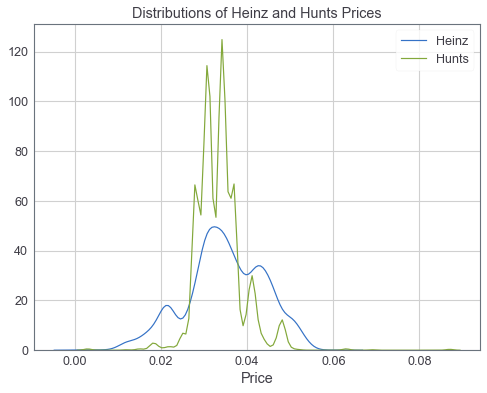

In [31]:
plt.figure(figsize=(8,6))
sns.kdeplot(data['PRICEHEINZ'], label='Heinz')
sns.kdeplot(data['PRICEHUNTS'], label='Hunts')
plt.title('Distributions of Heinz and Hunts Prices')
plt.xlabel('Price')

Due to the small sample size, we see a lot of local peaks and valleys in their respective distributions, but we can see the following:  
- Both price distributions seem to be roughly centered around similar values.
- The variance for Heinz prices is larger than that of Hunts.
- If the prices are similar, on average, then perhaps the effects of promotional methods are greater than that of prices on brand choice.

Text(0.5, 0, 'Price')

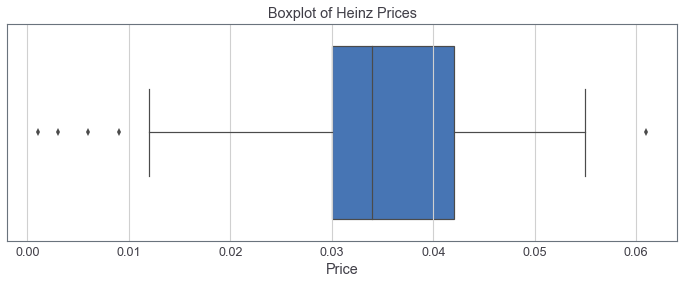

In [32]:
# Heinz
plt.figure(figsize=(12,4))
sns.boxplot(x='PRICEHEINZ', data=data)
plt.title('Boxplot of Heinz Prices')
plt.xlabel('Price')

Text(0.5, 0, 'Price')

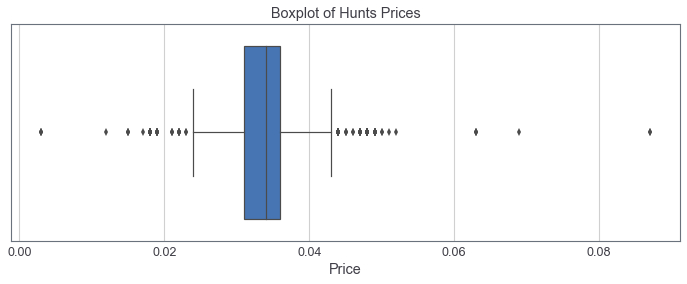

In [33]:
# Hunts
plt.figure(figsize=(12,4))
sns.boxplot(x='PRICEHUNTS', data=data)
plt.title('Boxplot of Hunts Prices')
plt.xlabel('Price')

As evident in the above boxplots, there are some outliers in the price distribution of Heinz and Hunts. Many predictive models, such as logistic regression which we will use later on, are sensitive to outliers; they can bias the estimators and underlying statistics of the model. We will treat these outliers in the next section.  

# Feature Engineering

Since we are interested in the relative difference of prices between Hunts and Heinz, let's create a new price ratio feature of Heinz to Hunts. This will be useful in making an inference about the price difference having an effect on customer brand choice. Also, let's visualize this new feature's distribution:

Text(0.5, 0, 'Heinz-to-Hunts Price Ratio')

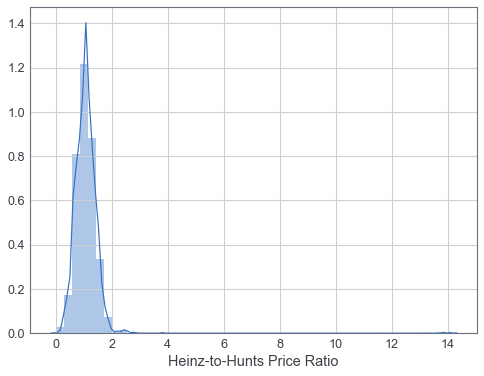

In [34]:
# Create the feature
data['priceratio'] = data['PRICEHEINZ']/data['PRICEHUNTS']

# Plot the distribution
plt.figure(figsize=(8,6))
sns.distplot(data['priceratio'])
plt.xlabel('Heinz-to-Hunts Price Ratio')

Notice that the outliers are still there, and are situated beyond the right-tail of the distribution. It is unclear what caused these outliers; it could have been data entry errors for some points and price inflation for other points. Because of this, it would probably not be wise to cap their values closer to the true distribution. In addition, deleting the outliers would not be a good idea since the dataset is already small. A good option would be to transform the ratio using a logarithm function:


Text(0.5, 0, 'Log of Heinz-to-Hunts Price Ratio')

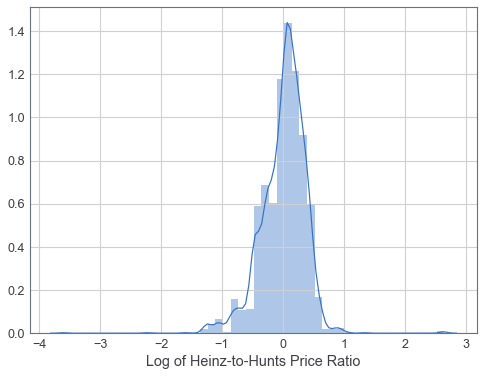

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(np.log(data['priceratio']))
plt.xlabel('Log of Heinz-to-Hunts Price Ratio')

It seems the distribution is more symmetric and the effects of outliers have been reduced. Now let's add it as a new feature:

In [36]:
# Add the new logpriceratio feauture
data['logpriceratio'] = np.log(data['priceratio'])

# Drop the old priceratio feature and the redundant HUNTS variable
data.drop(labels=['priceratio','HUNTS'], axis=1, inplace=True)

We currently have features for both promotional methods that are implemented by Heinz and Hunts. We can build a model to infer if a store feature or store display can individually affect the customer's brand choice. But what would be the effect on brand choice if both promotions are implemented simultaneously? To answer this question we need to create new interaction variables (for each brand) that represent this potential effect:

In [37]:
# Heinz
data['DisplHeinz*FeatHeinz'] = data['DisplHeinz']*data['FeatHeinz']

# Hunts
data['DisplHunts*FeatHunts'] = data['DisplHunts']*data['FeatHunts']

# Inspect all new features
data.head()

,HEINZ,PRICEHEINZ,PRICEHUNTS,FeatHeinz,FeatHunts,DisplHeinz,DisplHunts,logpriceratio,DisplHeinz*FeatHeinz,DisplHunts*FeatHunts
0,1,0.052,0.034,0,0,0,0,0.424883,0,0
1,1,0.052,0.044,0,0,0,0,0.167054,0,0
2,1,0.046,0.048,1,0,0,0,-0.042560,0,0
3,1,0.052,0.034,0,0,0,0,0.424883,0,0
4,1,0.046,0.048,1,0,0,0,-0.042560,0,0


# Feature Extraction

Rather than perform pairwise statistical tests to determine which variables affect the customer's brand choice, let's build an inferential logistic regression model to calculate the estimators for each variable and determine their statistical significance.

In [38]:
# Create feature set and response set
X = data.iloc[:,3:]
y = data['HEINZ']

Let's define a custom function that estimates customer brand choice based on the given features and outputs the maximum likelihood estimates and odds ratios:

In [39]:
def inferential_logit_model(predictors, response):
    
    # import statsmodels
    import statsmodels.api as sm
    
    # Instantiate and fit logistic model for inference
    LR = sm.Logit(response, sm.add_constant(predictors))
    result = LR.fit()
    
    # Create odds ratio estimates table
    params = np.exp(result.params)
    conf_1 = np.exp(result.conf_int()[0]) # at 2.5%
    conf_2 = np.exp(result.conf_int()[1]) # at 97.5%
    odds = pd.DataFrame(data=[params, conf_1, conf_2]).transpose().drop('const')
    odds.rename(columns={"Unnamed 0":"Odds Ratio Estimates", 0:"2.5%", 1:"97.5%"}, inplace=True)
    
    # Print the maximum likelihood estimates and odds ratio estimates tables with diagnostics
    print(result.summary(),'\n\n',odds)

Apply the function on the features and response:

In [40]:
inferential_logit_model(X,y)

Optimization terminated successfully.
         Current function value: 0.241401
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  HEINZ   No. Observations:                 2798
Model:                          Logit   Df Residuals:                     2790
Method:                           MLE   Df Model:                            7
Date:                Wed, 29 May 2019   Pseudo R-squ.:                  0.3022
Time:                        22:40:28   Log-Likelihood:                -675.44
converged:                       True   LL-Null:                       -967.92
                                        LLR p-value:                4.223e-122
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.2746      0.142     23.005      0.000       2.996       3.554

We can see that the following features are statistically significant with 95% confidence:  
- FeatHunts
- DisplHeinz
- DisplHunts
- logpriceratio
- Note that FeatHeinz is insignificant at this level, but only marginally. So we will still include it in predictive models to avoid loss of predictive power.

For Heinz, we can see that a store display is the only promotional method of the two that significantly affects customer brand choice, and should be implemented.
We can also see that the interaction variables are statistically insignificant, meaning that implementing both features does not have an effect on the relationship of promotional methods with brand choice.

# Machine Learning Models

Heinz would like to send coupons to customers that it predicts are likely to purchase their ketchup product. There are associated costs with incorrectly sending a coupon to a customer that is actually unlikely to purchase Heinz (false positives) and with failing to send a coupon to a customer that is actually likely to purchase Heinz (false negatives). The information provided for these costs are as follows:
- Cost of a false positive = 1
- Cost of a false negative = 0.25

In additon, recall that the classes in this data set are largely imbalanced, so implementing a model that naively assumes a prediction threshold of 0.5 is likely to perform poorly. Thus, we need to find a new threshold that accounts for both the difference in misclassification costs as well as the class imbalance.

So our strategy will be as follows: 
- Train 3 classifiers (to predict probabilities) and tune their hyperparameters using Grid Search with 5-fold cross-validation and stratified sampling. The goal of stratified sampling is to make sure that the ratio of classes is maintained in the cross-validation testing sets. The scoring metric will be precision, since false positives are more costly than false negatives.
- Find the prediction threshold that minimizes the cost function C = 1 x FalsePositives + 0.25 x FalseNegatives
- Evaluate final model performance using precision.


With that being said, let's begin by splitting the data into training and testing, making sure that the samples are stratified to have enough minority classes in the test set:

In [41]:
from sklearn.model_selection import train_test_split

X = X.iloc[:,:5] # Only using the statistically significant variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Before we proceed with training the models, let's define a function that performs Grid Search with cross-validation and prints the optimal set of parameters and grid search results table.

In [42]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score

def find_best_params(model,parameters,folds,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    
    skf = StratifiedKFold(n_splits=folds)

    grid = GridSearchCV(estimator=model, param_grid=parameters, cv=skf, scoring='precision', return_train_score=True)
    grid.fit(X_train,y_train)
    
    print('Estimator that yields best precision:\n {}\n'.format(grid.best_estimator_))
    print(pd.DataFrame(grid.cv_results_)[['params','mean_test_score','mean_train_score']])
    
    y_pred = grid.predict(X_test)
    
    print('\nPrecision on test set: {:.2f}\n'.format(round(precision_score(y_test, y_pred),6)))
    
    return grid.best_estimator_

Let's also define another function that prints the optimal threshold to minimize the cost function, and plots the cost as a function of thresholds ranging from 0 to 1:

In [43]:
# Define false positive and negative counters to be used in the calculations
def false_positives(y_true, y_pred):
    return np.sum((y_true==0) & (y_pred==1))
def false_negatives(y_true, y_pred):
    return np.sum((y_true==1) & (y_pred==0))

# Create the function to find the minimal misclassification cost by identifying the right threshold
def find_threshold_for_minimum_cost(model, X_test=X_test, y_test=y_test):

    probs = model.predict_proba(X_test)[:,1]
    
    levels = []
    FP = []
    FN = []

    for threshold in np.linspace(0,1,100):
        levels.append(threshold)
        class_pred = [1 if p>=threshold else 0 for p in probs]
        FP.append(false_positives(y_test,np.array(class_pred)))
        FN.append(false_negatives(y_test,np.array(class_pred)))

    Cost_df = pd.DataFrame(data=[levels,FP,FN]).transpose()
    Cost_df.rename(columns={0:'Threshold', 1:'False Positives', 2:'False Negatives'}, inplace=True)
    Cost_df['Cost'] = Cost_df['False Positives']*1 + Cost_df['False Negatives']*0.25

    plt.figure(figsize=(12,7.4))
    plt.plot(Cost_df['Threshold'], Cost_df['Cost'], 'r')
    plt.xlabel('Classification Threshold')
    plt.ylabel('Cost')
    plt.title('Cost of Mistargeted Marketing as a function of Classification Threshold')
    plt.grid()
    
    print(Cost_df.sort_values(by='Cost').head(1))

## 1st Model: Logistic Regression

Estimator that yields best precision:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

                         params  mean_test_score  mean_train_score
0   {'C': 0.1, 'penalty': 'l1'}         0.902316          0.902289
1   {'C': 0.1, 'penalty': 'l2'}         0.893134          0.893903
2     {'C': 1, 'penalty': 'l1'}         0.914970          0.915777
3     {'C': 1, 'penalty': 'l2'}         0.913726          0.913119
4    {'C': 10, 'penalty': 'l1'}         0.916365          0.917491
5    {'C': 10, 'penalty': 'l2'}         0.915925          0.916874
6   {'C': 100, 'penalty': 'l1'}         0.916365          0.918100
7   {'C': 100, 'penalty': 'l2'}         0.916365          0.918100
8  {'C': 1000, 'penalty': 'l1'}         0.916365          0.918100
9  {'C': 1000, 'penalty': '

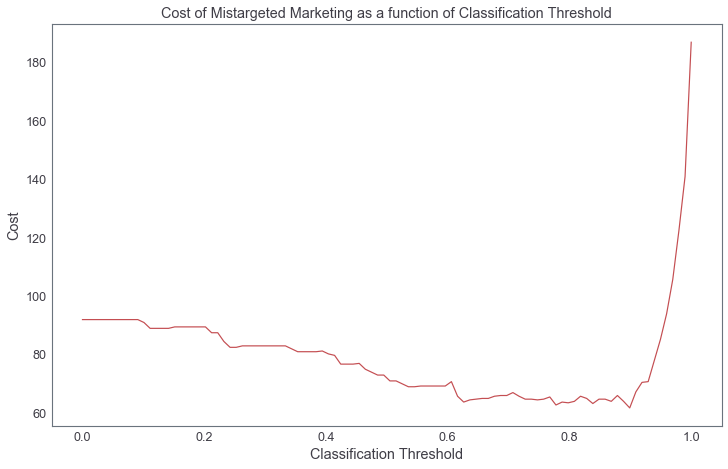

In [44]:
from sklearn.linear_model import LogisticRegression

parameters = {'C':[0.1,1,10,100,1000], 'penalty':['l1','l2']}
LR = LogisticRegression()

find_threshold_for_minimum_cost(model=find_best_params(model=LR, parameters=parameters, folds=5))

## 2nd Model: Support Vector Machine

Estimator that yields best precision:
 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

                      params  mean_test_score  mean_train_score
0      {'C': 10, 'gamma': 1}         0.896130          0.897706
1     {'C': 10, 'gamma': 10}         0.903497          0.904846
2    {'C': 10, 'gamma': 100}         0.914476          0.916233
3     {'C': 100, 'gamma': 1}         0.904629          0.905338
4    {'C': 100, 'gamma': 10}         0.910257          0.911138
5   {'C': 100, 'gamma': 100}         0.916033          0.917890
6    {'C': 1000, 'gamma': 1}         0.905936          0.906434
7   {'C': 1000, 'gamma': 10}         0.913450          0.916330
8  {'C': 1000, 'gamma': 100}         0.916160          0.918581

Precision on test set: 0.91

    Threshold  False Positives  False Negatives   Cost
89    0.89899

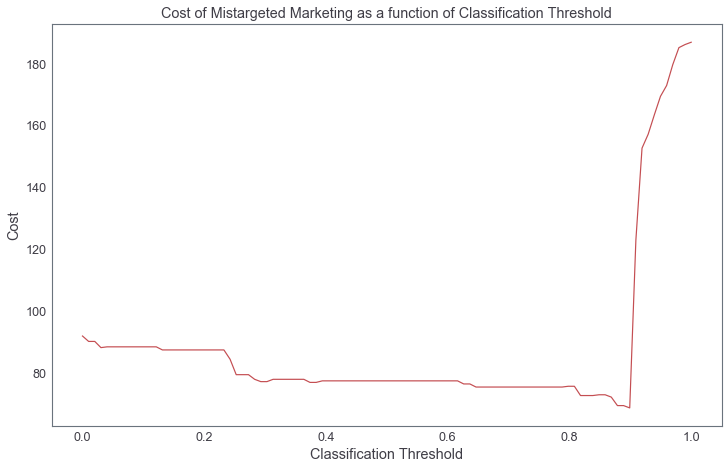

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# SVM is a Euclidean distance based algorithm and will require scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

svc = SVC(probability=True)
parameters = {'C': [10, 100, 1000], 
              'gamma': [1, 10, 100]}

svc_grid = find_best_params(model=svc, parameters=parameters, folds=5, X_train=X_train_scaled, X_test=X_test_scaled)

find_threshold_for_minimum_cost(model=svc_grid, X_test=X_test_scaled, y_test=y_test)

## 3rd Model: Random Forest

Estimator that yields best precision:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

                                               params  mean_test_score  \
0   {'criterion': 'gini', 'max_depth': 4, 'max_fea...         0.921472   
1   {'criterion': 'gini', 'max_depth': 4, 'max_fea...         0.921504   
2   {'criterion': 'gini', 'max_depth': 4, 'max_fea...         0.919936   
3   {'criterion': 'gini', 'max_depth': 4, 'max_fea...         0.921504   
4   {'criterion': 'gini', 'max_depth': 4, 'max_fea...         0.921504   
5   {'criterion': 'gini', 'max_depth': 4, 'max_fea...         0.921504   
6   {'criterion': 'g

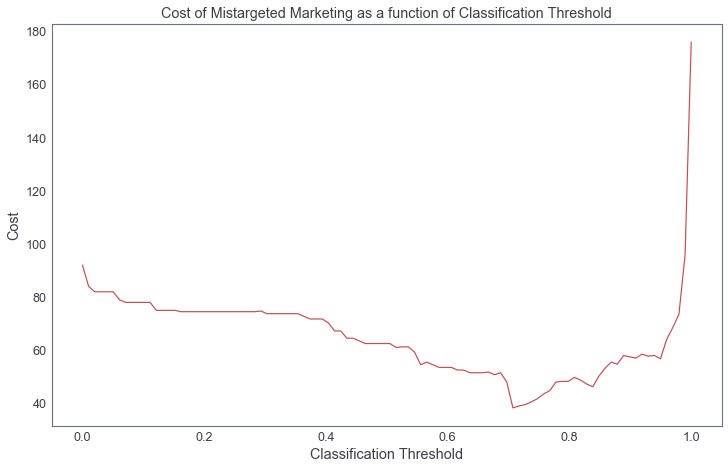

In [46]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rfc = RandomForestClassifier()
parameters = {'n_estimators': [200, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' : ['gini', 'entropy']}

find_threshold_for_minimum_cost(model=find_best_params(model=rfc, parameters=parameters, folds=5))

# Summary

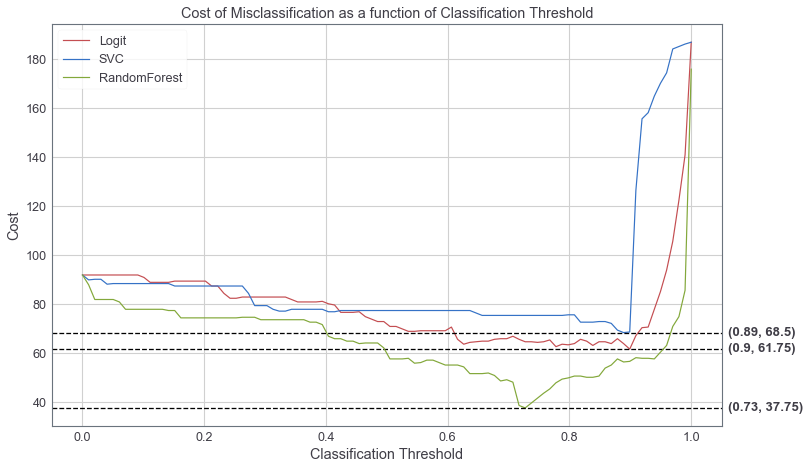

In [48]:
# logit cost table
logit_optimal = LogisticRegression(C=10, penalty='l1')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

logit_optimal.fit(X_train, y_train)
probs = logit_optimal.predict_proba(X_test)[:,1]

levels = []
FP = []
FN = []
cost = []

for threshold in np.linspace(0,1,100):
    levels.append(threshold)
    class_pred = [1 if p>=threshold else 0 for p in probs]
    FP.append(false_positives(y_test,np.array(class_pred)))
    FN.append(false_negatives(y_test,np.array(class_pred)))
    
Cost_df_logit = pd.DataFrame(data=[levels,FP,FN]).transpose()
Cost_df_logit.rename(columns={0:'Threshold', 1:'False Positives', 2:'False Negatives'}, inplace=True)
Cost_df_logit['Cost'] = Cost_df_logit['False Positives']*1 + Cost_df_logit['False Negatives']*0.25

# SVC cost table
svc_optimal = SVC(C=1000, gamma=100, probability=True)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

svc_optimal.fit(X_train_scaled, y_train)
probs = svc_optimal.predict_proba(X_test_scaled)[:,1]

levels = []
FP = []
FN = []
cost = []

for threshold in np.linspace(0,1,100):
    levels.append(threshold)
    class_pred = [1 if p>=threshold else 0 for p in probs]
    FP.append(false_positives(y_test,np.array(class_pred)))
    FN.append(false_negatives(y_test,np.array(class_pred)))
    
Cost_df_svc = pd.DataFrame(data=[levels,FP,FN]).transpose()
Cost_df_svc.rename(columns={0:'Threshold', 1:'False Positives', 2:'False Negatives'}, inplace=True)
Cost_df_svc['Cost'] = Cost_df_svc['False Positives']*1 + Cost_df_svc['False Negatives']*0.25

# RFC cost table
rfc_optimal = RandomForestClassifier(criterion='gini', max_depth=8, 
                                     max_features='log2', n_estimators=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rfc_optimal.fit(X_train, y_train)
probs = rfc_optimal.predict_proba(X_test)[:,1]

levels = []
FP = []
FN = []
cost = []

for threshold in np.linspace(0,1,100):
    levels.append(threshold)
    class_pred = [1 if p>=threshold else 0 for p in probs]
    FP.append(false_positives(y_test,np.array(class_pred)))
    FN.append(false_negatives(y_test,np.array(class_pred)))
    
Cost_df_rfc = pd.DataFrame(data=[levels,FP,FN]).transpose()
Cost_df_rfc.rename(columns={0:'Threshold', 1:'False Positives', 2:'False Negatives'}, inplace=True)
Cost_df_rfc['Cost'] = Cost_df_rfc['False Positives']*1 + Cost_df_rfc['False Negatives']*0.25

# Get coordinates for (threshold, minimum_cost) for each model:
min_logit = Cost_df_logit['Cost'].min()
threshold_logit = Cost_df_logit.loc[Cost_df_logit['Cost'] == min_logit]['Threshold'].values.item()
logit_coords = '({}, {})'.format(round(threshold_logit,2), min_logit)
min_svc = Cost_df_svc['Cost'].min()
threshold_svc = Cost_df_svc.loc[Cost_df_svc['Cost'] == min_svc]['Threshold'].values.item()
svc_coords = '({}, {})'.format(round(threshold_svc,2), min_svc)
min_rfc = Cost_df_rfc['Cost'].min()
threshold_rfc = Cost_df_rfc.loc[Cost_df_rfc['Cost'] == min_rfc]['Threshold'].values.item()
rfc_coords = '({}, {})'.format(round(threshold_rfc,2), min_rfc)

# Plot costs of mistargeted marketing for all three models:
plt.figure(figsize=(12,7.4))

plt.plot(levels, Cost_df_logit['Cost'], 'r', label='Logit')
plt.axhline(y=min_logit, ls='--', c='black',lw=1.3)
plt.annotate(logit_coords, xy=(1.05,min_logit), va='center', 
             xytext=(1.06,min_logit), fontsize='medium', 
             fontweight='semibold')

plt.plot(levels, Cost_df_svc['Cost'], 'b', label='SVC')
plt.axhline(y=min_svc, ls='--', c='black',lw=1.3)
plt.annotate(svc_coords, xy=(1.05,min_svc), va='center', 
             xytext=(1.06,min_svc), fontsize='medium', 
             fontweight='semibold')

plt.plot(levels, Cost_df_rfc['Cost'], 'g', label='RandomForest')
plt.axhline(y=min_rfc, ls='--', c='black', lw=1.3)
plt.annotate(rfc_coords, xy=(1.05,min_rfc), va='center', 
             xytext=(1.06,min_rfc), fontsize='medium', 
             fontweight='semibold')

plt.xlabel('Classification Threshold')
plt.ylabel('Cost')
plt.title('Cost of Misclassification as a function of Classification Threshold')
plt.legend()

We can see that the random forest had the best performance among the three classifiers, achieving a minimum cost of 37.75 at a classification threshold of 0.73. The precision on the testing holdout set was 92%, beating both other classifiers by 1%. Refer to the classification report and confusion matrix below to see how well it performed.

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

probs = rfc_optimal.predict_proba(X_test)[:,1]
rfc_pred = [1 if p>=0.73 else 0 for p in probs]

print('Confusion Matrix: \n', confusion_matrix(y_test, rfc_pred),'\n')
print('Classification Report: \n', classification_report(y_test, rfc_pred),'\n')

Confusion Matrix: 
 [[ 65  27]
 [ 39 709]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.71      0.66        92
           1       0.96      0.95      0.96       748

   micro avg       0.92      0.92      0.92       840
   macro avg       0.79      0.83      0.81       840
weighted avg       0.93      0.92      0.92       840
 

